In [19]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import pickle
from src import *
from mapping_reef_classes import get_coordinates
import glob

In [20]:
# out_folder, Ymmdd = make_out_folder()
# Ymmdd = '20240202'
out_folder = '2019-2023-20240424'

## Old Headers

In [3]:
# Old Metadata
# headers_2019 = list_files(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2019.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2019, fp)
# headers_2020 = list_files(r"Z:\CollectMetadata",'corrected_combined.csv')
# with open(os.path.join(out_folder,"headers_2020.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2020, fp)
# headers_2021 = list_files(r"Z:\Headers2021",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2021.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2021, fp)
# headers_2022 = list_files(r"Z:\Headers2022",'raw_image_headers.csv') 
# with open(os.path.join(out_folder,"headers_2022.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2022, fp)
# headers_2023 = list_files(r"Z:\Headers2023",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2023.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2023, fp)

In [4]:
## Load Headers Lists
# with open(os.path.join(out_folder,"headers_2019.txt"), "rb") as fp:   #unpickling
#     headers_2019 = pickle.load(fp)
# with open(os.path.join(out_folder,"headers_2020.txt"), "rb") as fp:   
#     headers_2020 = pickle.load(fp)
# with open(os.path.join(out_folder,"headers_2021.txt"), "rb") as fp:   
#     headers_2021 = pickle.load(fp)
# with open(os.path.join(out_folder,"headers_2022.txt"), "rb") as fp:  
#     headers_2022 = pickle.load(fp)
# with open(os.path.join(out_folder,"headers_2023.txt"), "rb") as fp:   
#     headers_2023 = pickle.load(fp)
# headers = headers_2019 + headers_2020 + headers_2021 + headers_2022 + headers_2023 
# print(len(headers)) # 857

In [5]:
columns_ = ["image_name", "Heading_D", "Pitch_D", "Roll_D", "Temp_C", "AUV_depth_m", "Alt_m", "Salinity_ppt", "Speed_kn", "Lat_DD", "Long_DD", "CreationTime", "EpochTime","Usability", "collect_id"]
columns_ = ["image_name", "collect_id"]
# Created this dictionary to force similar column names into the same name, ie 'Latitude (decimal degrees)' --> 'Lat_DD'
header_dict = {'image_name': 'image_name', 'Unnamed: 0':'image_name','image_filename':'image_name', 'filename':'image_name', 'HeadingCompass_deg':'Heading_D' ,'Heading (degrees)':'Heading_D','INS Heading':'Heading_D',
                'PitchCompass_deg':'Pitch_D','Pitch (degrees)':'Pitch_D', 'Pitch Angle':'Pitch_D', 'RollCompass_deg': 'Roll_D', 'Roll (degrees)': 'Roll_D','Roll Angle':'Roll_D',
                'TempCompass_C': 'Temp_C', 'Temperature (C)': 'Temp_C','Temperature (c)':'Temp_C', 'AUV_depth_m':'AUV_depth_m', 'Depth (m)':'AUV_depth_m','DFS Depth(m)':'AUV_depth_m',
                'Alt_m' : 'Alt_m', 'Altitude (m)':'Alt_m', 'DTB Height(m)':'Alt_m', 'DistanceToBottom_m': 'Alt_m', 'Salinity_ppt': 'Salinity_ppt', 'Salinity (ppt)':'Salinity_ppt','Salinity (ppt)':'Salinity_ppt',
                'CreationTime':'CreationTime', 'Creation Time':'CreationTime', 'EpochTime':'EpochTime', 'SpeedGPS_kn':'Speed_kn', 'Speed (knots)':'Speed_kn','GPS Speed (Kn)': 'Speed_kn', 
                'Lat_DD': 'Lat_DD', 'Latitude':'Lat_DD', 'Latitude (decimal degrees)':'Lat_DD',       
                'Long_DD': 'Long_DD', 'Longitude':'Long_DD','Longitude (decimal degrees)':'Long_DD'}

In [6]:
# header_2019 = combine_headers(headers_2019, columns_, header_dict)
# header_2020 = combine_headers(headers_2020, columns_=None, header_dict=None)
# header_2021 = combine_headers(headers_2021, columns_=None, header_dict=None)
# header_2022 = combine_headers(headers_2022, columns_=None, header_dict=None)
# header_2023 = combine_headers(headers_2023, columns_=None, header_dict=None)

## Cleaning up based on altitude and lat/lon
# header_2019_c = clean_combined_header(header_2019, 2019, out_folder, dpth = 1, alt = 4, clean_lat_lon = True)
# header_2020_c = clean_combined_header(header_2020, 2020, out_folder, dpth = 1, alt = 4, clean_lat_lon = True)
# header_2021_c = clean_combined_header(header_2021, 2021, out_folder, dpth = 1, alt = 4, clean_lat_lon = True)
# header_2022_c = clean_combined_header(header_2022, 2022, out_folder, dpth = 1, alt = 4, clean_lat_lon = True)
# header_2023_c = clean_combined_header(header_2023, 2023, out_folder, dpth = 1, alt = 4, clean_lat_lon = True)
# header_2019_c = pd.read_pickle(f'{out_folder}/2019_headers_combined_filtered.pickle')
# header_2020_c = pd.read_pickle(f'{out_folder}/2020_headers_combined_filtered.pickle')
# header_2021_c = pd.read_pickle(f'{out_folder}/2021_headers_combined_filtered.pickle')
# header_2022_c = pd.read_pickle(f'{out_folder}/2022_headers_combined_filtered.pickle')
# header_2023_c = pd.read_pickle(f'{out_folder}/2023_headers_combined_filtered.pickle')
'''
2019 (66582, 16)
2020 (1908250, 16)
2021 (246727, 16)
2022 (221681, 16)
2023 (207608, 16)
'''

'\n2019 (66582, 16)\n2020 (1908250, 16)\n2021 (246727, 16)\n2022 (221681, 16)\n2023 (207608, 16)\n'

## Colects Lists

In [33]:
# # Collects lists
# collects2019 = list_collects(r"M:\AUV_Collects\2019")
# with open(os.path.join(out_folder,"collects2019.txt"), "wb") as fp:   #Pickling
#     pickle.dump(collects2019, fp)
# collects2020 = list_collects(r"W:\AUV_Collects\2020")
# with open(os.path.join(out_folder,"collects2020.txt"), "wb") as fp:   #Pickling
#     pickle.dump(collects2020, fp)
# collects2021 = list_collects(r"W:\AUV_Collects\2021")
# with open(os.path.join(out_folder,"collects2021.txt"), "wb") as fp:   #Pickling
#     pickle.dump(collects2021, fp)
# collects2022 = list_collects(r"Z:\AUV_Collects\2022")
# with open(os.path.join(out_folder,"collects2022.txt"), "wb") as fp:   #Pickling
#     pickle.dump(collects2022, fp)
# collects2023 = list_collects(r"X:\AUV_Collects\2023")
# with open(os.path.join(out_folder,"collects2023.txt"), "wb") as fp:   #Pickling
#     pickle.dump(collects2023, fp)

# ## Load Collects Lists
with open(os.path.join(out_folder,"collects2019.txt"), "rb") as fp:   #unpickling
    collects2019 = pickle.load(fp)
with open(os.path.join(out_folder,"collects2020.txt"), "rb") as fp:   
    collects2020 = pickle.load(fp)
with open(os.path.join(out_folder,"collects2021.txt"), "rb") as fp:   
    collects2021 = pickle.load(fp)
with open(os.path.join(out_folder,"collects2022.txt"), "rb") as fp:  
    collects2022 = pickle.load(fp)
with open(os.path.join(out_folder,"collects2023.txt"), "rb") as fp:   
    collects2023 = pickle.load(fp)
all_collects = collects2019 + collects2020 + collects2021 + collects2022 + collects2023
with open(os.path.join(out_folder,"all_collects_paths.txt"), "wb") as fp:   #Pickling
    pickle.dump(all_collects, fp)
print(len(all_collects)) # 508 642

642


## Images Lists

In [8]:
# ## creating lists of unpacked image names and paths

# images_2019 =  glob.glob(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects\*\image_raw\*.png")
# with open(os.path.join(out_folder,"images_2019.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2019, fp)
# images_2020 =  glob.glob(r"Z:\__Organized_Directories_InProgress\2020_UnpackedCollects\*\image_raw\*.png")
# with open(os.path.join(out_folder,"images_2020.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2020, fp)
# images_2021 =  glob.glob(r"Z:\__Organized_Directories_InProgress\2021_UnpackedCollects\*\image_raw\*.png")
# with open(os.path.join(out_folder,"images_2021.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2021, fp)
# images_2022 =  glob.glob(r"Z:\__Organized_Directories_InProgress\2022_UnpackedCollects\*\image_raw\*.png")
# with open(os.path.join(out_folder,"images_2022.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2022, fp)
# images_2023 =  glob.glob(r"Z:\__Organized_Directories_InProgress\2023_UnpackedCollects\*\image_raw\*.png")
# with open(os.path.join(out_folder,"images_2023.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2023, fp)

## Loading Images Lists
with open(os.path.join(out_folder,"images_2019.txt"), "rb") as fp:   #unpickling
    images_2019 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2020.txt"), "rb") as fp:   
    images_2020 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2021.txt"), "rb") as fp:   
    images_2021 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2022.txt"), "rb") as fp:  
    images_2022 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2023.txt"), "rb") as fp:   
    images_2023 = pickle.load(fp)
image_list = images_2019 + images_2020 + images_2021 + images_2022 + images_2023
print(len(image_list)) # 2035662 2041537 2300780 1678865 1600235 976615 974668

974668


In [9]:
## Dataframe of all unpacked images and their paths based on a list of paths
# df_imgs_2019 = create_image_df_save_pckle(image_list=images_2019, out_folder=out_folder, year=2019)
# df_imgs_2020 = create_image_df_save_pckle(image_list=images_2020, out_folder=out_folder, year=2020)
# df_imgs_2021 = create_image_df_save_pckle(image_list=images_2021, out_folder=out_folder, year=2021)
# df_imgs_2022 = create_image_df_save_pckle(image_list=images_2022, out_folder=out_folder, year=2022)
# df_imgs_2023 = create_image_df_save_pckle(image_list=images_2023, out_folder=out_folder, year=2023)

df_imgs_2019 = pd.read_pickle(os.path.join(out_folder,"2019_imgs.pickle"))
df_imgs_2020 = pd.read_pickle(os.path.join(out_folder,"2020_imgs.pickle"))
df_imgs_2021 = pd.read_pickle(os.path.join(out_folder,"2021_imgs.pickle"))
df_imgs_2022 = pd.read_pickle(os.path.join(out_folder,"2022_imgs.pickle"))
df_imgs_2023 = pd.read_pickle(os.path.join(out_folder,"2023_imgs.pickle"))

'''
2019 (8704, 2)
2020 (112808, 3)
2021 (279385, 3)
2022 (271209, 3)
2023 (302562, 3)
Total imgs:  974668
'''
print("Total imgs: ", len(df_imgs_2019)+len(df_imgs_2020)+len(df_imgs_2021)+len(df_imgs_2022)+len(df_imgs_2023)) #2253118


2020 (112808, 3)
2021 (279385, 3)
2022 (271209, 3)
2023 (302562, 3)
Total imgs:  974668


## Metadata

In [10]:
# # New metadata
headers = pd.Series(list_files(r"Z:\CollectMetadata",'Primary_Image_Metadata.csv'))
# headers_2019 = list(headers[headers.str.contains("2019\d{4}_")])
headers_2020 = list(headers[headers.str.contains("2020\d{4}_")])
headers_2021 = list(headers[headers.str.contains("2021\d{4}_")])
headers_2022 = list(headers[headers.str.contains("2022\d{4}_")])
headers_2023 = list(headers[headers.str.contains("2023\d{4}_")])
headers_2024 = list(headers[headers.str.contains("2024\d{4}_")])
assert len(headers_2020) + len(headers_2021) + len(headers_2022) + len(headers_2023) + len(headers_2024) == len(headers)
print(len(headers)) # 508

508


### Reading and combining All metadata by year and cleaning

In [11]:
# header_2019 = combine_headers(headers_2019)
# header_2020 = combine_headers(headers_2020)
# header_2021 = combine_headers(headers_2021)
# header_2022 = combine_headers(headers_2022)
# header_2023 = combine_headers(headers_2023)


# header_2019.to_csv(os.path.join(out_folder, "header_2019_combined.csv"))
# header_2020.to_csv(os.path.join(out_folder, "header_2020_combined.csv"))
# header_2021.to_csv(os.path.join(out_folder, "header_2021_combined.csv"))
# header_2022.to_csv(os.path.join(out_folder, "header_2022_combined.csv"))
# header_2023.to_csv(os.path.join(out_folder, "header_2023_combined.csv"))

header_2020 = pd.read_csv(os.path.join(out_folder, "header_2020_combined.csv"), index_col=0, low_memory=False)
header_2021 = pd.read_csv(os.path.join(out_folder, "header_2021_combined.csv"), index_col=0, low_memory=False)
header_2022 = pd.read_csv(os.path.join(out_folder, "header_2022_combined.csv"), index_col=0, low_memory=False)
header_2023 = pd.read_csv(os.path.join(out_folder, "header_2023_combined.csv"), index_col=0, low_memory=False)

''' 
2020 (130677, 121)
2021 (383058, 143)
2022 (429026, 143)
2023 (413996, 143)
'''
print("2020", header_2020.shape)
print("2021", header_2021.shape)
print("2022", header_2022.shape)
print("2023", header_2023.shape)

2020 (130677, 121)
2021 (383058, 143)
2022 (429026, 143)
2023 (413996, 143)


### Filter metadata by unpacked images

In [12]:
# header_times = pd.concat([header_2019_c.EpochTime, header_2020_c.EpochTime, header_2021_c.EpochTime, header_2022_c.EpochTime, header_2023_c.EpochTime])
# plot_epoch_time(df1=header_times, df2=pd.DataFrame(),title=None, lbl1=None, lbl2=None)

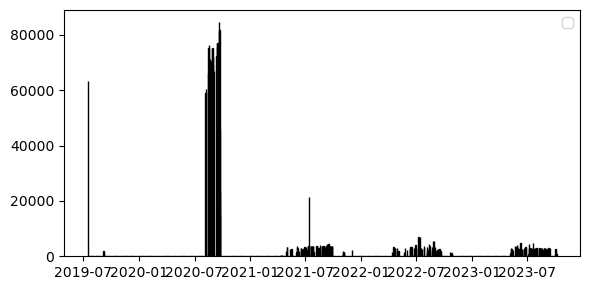

### Unpacked Images Metadata

In [13]:

# df_collects = pd.read_excel("Z:/HeadersCombined/2019-2023_Collects_Survey_Names.xlsx", index_col=0)
# df_collects.OP_DATE = pd.to_datetime(df_collects.OP_DATE)
# df_unp_2019 = create_unpacked_images_metatada_df(header_2019, df_imgs_2019, 2019)
df_unp_2020 = create_unpacked_images_metatada_df(header_2020, df_imgs_2020, 2020)
df_unp_2021 = create_unpacked_images_metatada_df(header_2021, df_imgs_2021, 2021)
df_unp_2022 = create_unpacked_images_metatada_df(header_2022, df_imgs_2022, 2022)
df_unp_2023 = create_unpacked_images_metatada_df(header_2023, df_imgs_2023, 2023)
'''
2019 (3363, 21)

2020 (112808, 123)
2021 (252134, 145)
2022 (241828, 145)
2023 (300456, 145)
'''

2020 (112808, 123)
2021 (252134, 145)
2022 (241828, 145)
2023 (300456, 145)


'\n2019 (3363, 21)\n\n2020 (112808, 123)\n2021 (252134, 145)\n2022 (241986, 145)\n2023 (300371, 145)\n'

### Finished with creating metatadata

In [17]:
def make_op_table(header_list, SiteIds_df):
    RVCAT_OP = pd.DataFrame(columns=["OP_ID", "TARGET", "YEAR", "OP_DATE", "TIME", "SERIAL", "SAMPLE_TYPE", "LAKE", "CRUISE", "VESSEL", "SITE", "SURVEY"])
    for header in header_list:
        Time_s = header.Time_s
        VehicleID = header.VehicleID
        datetime = pd.to_datetime(Time_s,unit='s', utc=True)
        est_time = datetime.dt.tz_convert('US/Eastern')
        col_lake = dict(SiteIds_df[["CollectID", "Lake"]].values)
        col_siteid = dict(SiteIds_df[["CollectID", "SiteID"]].values)
        col_surveytype = dict(SiteIds_df[["CollectID", "Survey_Type"]].values)
        df = pd.DataFrame(columns=["OP_ID", "TARGET", "YEAR", "OP_DATE", "TIME", "SERIAL", "SAMPLE_TYPE", "LAKE", "CRUISE", "VESSEL", "SITE"])
        df['YEAR'] = est_time.dt.year
        df['OP_DATE'] = est_time.dt.date
        df['TIME'] = est_time.dt.time
        df['COLLECT_ID'] =  header.collect_id
        df['VESSEL'] =  VehicleID
        RVCAT_ = df.groupby("COLLECT_ID").first().reset_index()
        RVCAT_['SERIAL'] = np.arange(0,len(RVCAT_),1)
        RVCAT_['CRUISE'] = np.arange(0,len(RVCAT_),1)
        RVCAT_['SAMPLE_TYPE'] = "AUV"
        RVCAT_["LAKE"] = RVCAT_.COLLECT_ID.map(col_lake)
        RVCAT_["SITE"] = RVCAT_.COLLECT_ID.map(col_siteid)
        RVCAT_["SURVEY"] = RVCAT_.COLLECT_ID.map(col_surveytype)
        RVCAT_OP = pd.concat([RVCAT_OP, RVCAT_])
    return RVCAT_OP

In [18]:
SiteIds_df = pd.read_csv("Z:\HeadersCombined\SiteIDs_Master.csv")
header_list = [header_2020, header_2021, header_2022, header_2023]
df_OP = make_op_table(header_list, SiteIds_df)
df_OP.to_csv("op_table.csv")
df_OP

,OP_ID,TARGET,YEAR,OP_DATE,TIME,SERIAL,SAMPLE_TYPE,LAKE,CRUISE,VESSEL,SITE,SURVEY,COLLECT_ID
0,None,None,2020,2020-08-05,12:45:54.893936,0,AUV,Michigan,0,IVER3-3069,LM_20_08,GOBY,20200805_001_Iver3069_ABS1
1,None,None,2020,2020-08-06,06:26:38,1,AUV,Michigan,1,IVER3-3069,LM_20_06,GOBY,20200806_001_Iver3069_ABS1
2,None,None,2020,2020-08-07,06:03:56,2,AUV,Michigan,2,IVER3-3069,LM_20_05,GOBY,20200807_001_Iver3069_ABS1
3,None,None,2020,2020-08-09,06:32:24,3,AUV,Michigan,3,IVER3-3069,LM_20_04,GOBY,20200809_001_Iver3069_ABS1
4,None,None,2020,2020-08-11,07:24:56.668066,4,AUV,Michigan,4,IVER3-3069,LM_20_03,GOBY,20200811_001_Iver3069_ABS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,None,None,2023,2023-11-15,12:07:17.001150,152,AUV,Ontario,152,IVER3-3069,Trubbles Recovery 11/15,Trubbles Recovery 11/15,20231115_001_Iver3069_ABS2
153,None,None,2023,2023-11-17,13:34:36.606663,153,AUV,Ontario,153,IVER3-3069,Trubbles Recovery 11/17,Trubbles Recovery 11/17,20231117_001_Iver3069_ABS2
154,None,None,2023,2023-11-18,11:35:36.072310,154,AUV,Ontario,154,IVER3-3069,Trubbles Recovery 11/18,Trubbles Recovery 11/18,20231118_001_Iver3069_ABS2
155,None,None,2023,2023-11-19,11:23:50.483891,155,AUV,Ontario,155,IVER3-3069,Trubbles Recovery 11/19,Trubbles Recovery 11/19,20231119_001_Iver3069_ABS2
